이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [12]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. KNN 과제

## 1. 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/3주차/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Feature와 Target 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3. KNN 구현 & 파라미터 튜닝


In [10]:
from sklearn.model_selection import GridSearchCV

# KNN 모델 초기화
knn = KNeighborsClassifier()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 확인
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 23}
Best Cross-Validation Accuracy: 0.7605757696921231


## 4. 평가

In [13]:
# 최적의 모델로 예측
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 성능 평가
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7532467532467533
Confusion Matrix:
 [[86 13]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [14]:
#Weight KNN 적용

# Weight 파라미터 추가
param_grid_weighted = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search_weighted = GridSearchCV(knn, param_grid_weighted, cv=5, scoring='accuracy')
grid_search_weighted.fit(X_train, y_train)

# 최적의 파라미터와 성능 확인
print("Best Parameters (Weighted):", grid_search_weighted.best_params_)
print("Best Cross-Validation Accuracy (Weighted):", grid_search_weighted.best_score_)

# 최적의 모델로 예측
best_knn_weighted = grid_search_weighted.best_estimator_
y_pred_weighted = best_knn_weighted.predict(X_test)

# 성능 평가
print("Test Accuracy (Weighted):", accuracy_score(y_test, y_pred_weighted))
print("Confusion Matrix (Weighted):\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification Report (Weighted):\n", classification_report(y_test, y_pred_weighted))

Best Parameters (Weighted): {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Best Cross-Validation Accuracy (Weighted): 0.7670798347327735
Test Accuracy (Weighted): 0.7597402597402597
Confusion Matrix (Weighted):
 [[86 13]
 [24 31]]
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



---
# 2. K-Means 과제

## 1. 데이터 로드

In [15]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/3주차/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [17]:
# 결측치 확인
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [18]:
# 결측치가 있는 열 삭제
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# 삭제 후 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


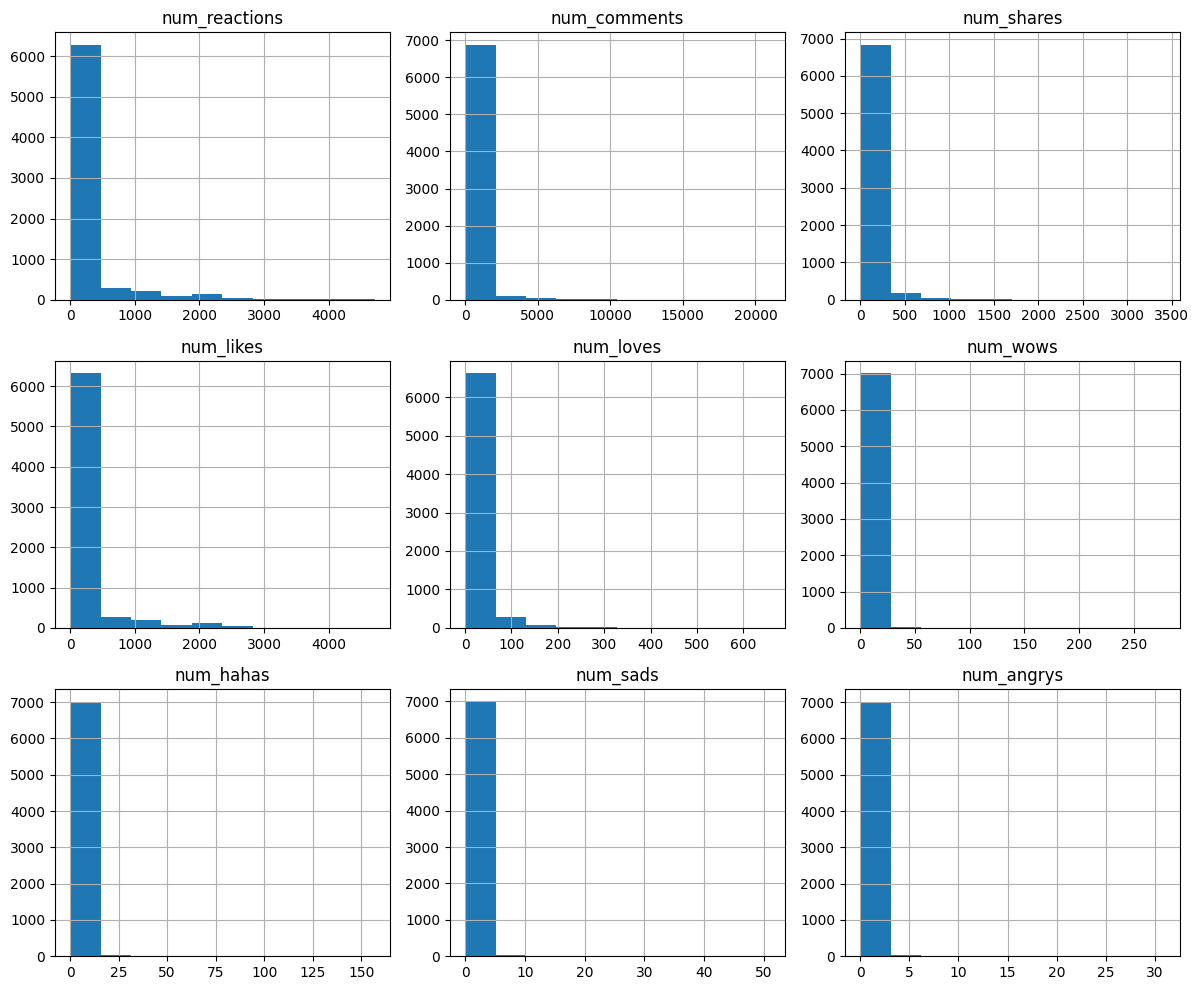

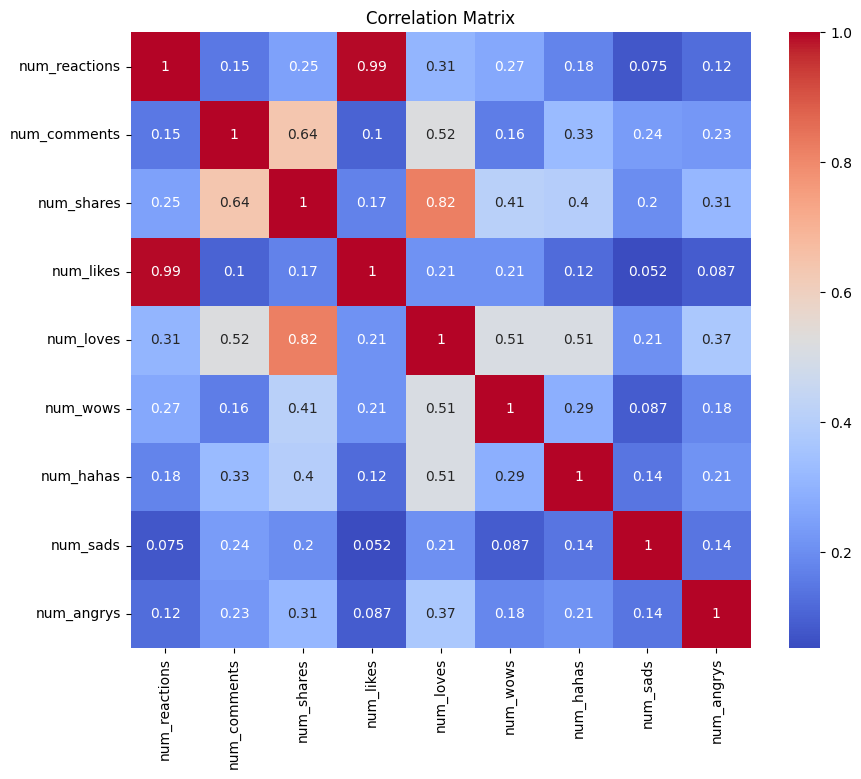

In [22]:
# 데이터의 기본 통계 확인
df.describe()

# 데이터 분포 시각화
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 상관관계 행렬 계산을 위해 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관관계 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. K-Means 구현 & 파라미터 튜닝

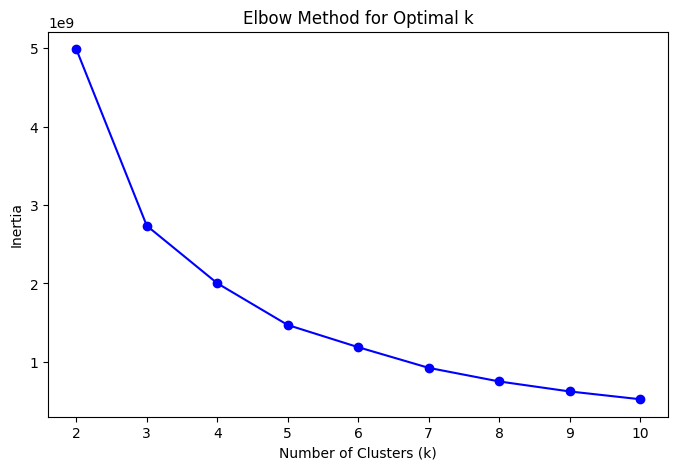

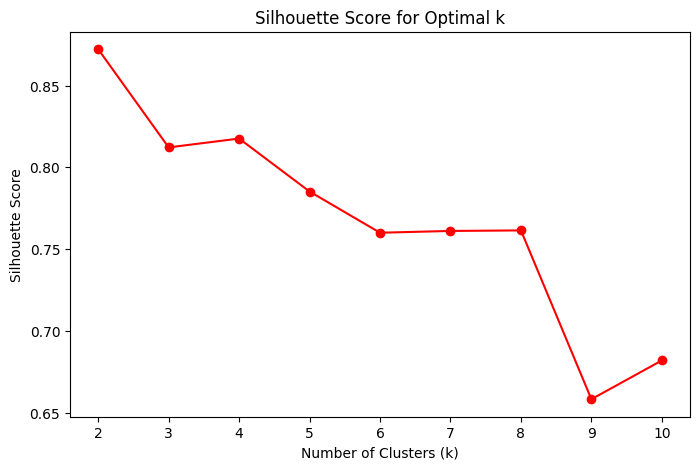

In [23]:
# K-Means 클러스터링에 사용할 숫자형 데이터 선택
df_scaled = numeric_df

# Elbow Method와 Silhouette Score를 사용하여 최적의 클러스터 수 찾기
inertia = []
silhouette_scores = []
K = range(2, 11)  # 클러스터 수 후보군

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score plot
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


## 4. 평가

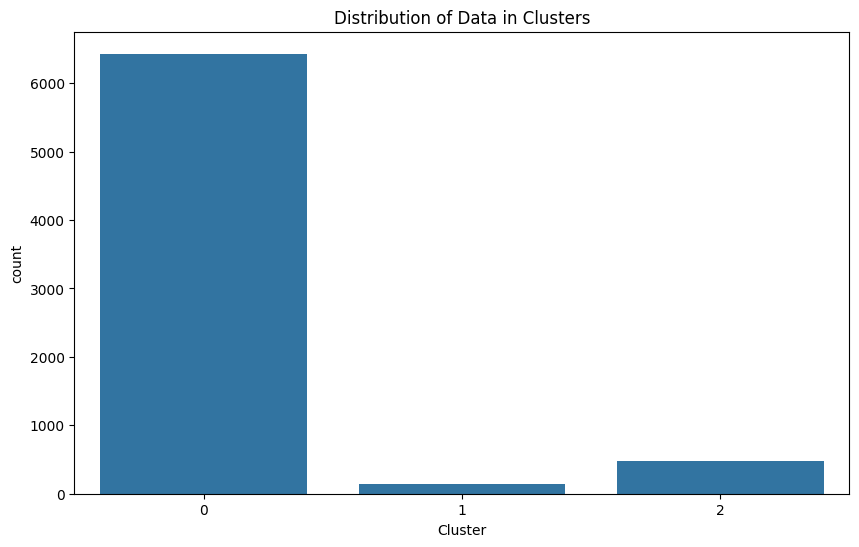

Cluster Centers:
    num_reactions  num_comments  num_shares    num_likes  num_loves  num_wows  \
0     113.000000    108.951003   24.790170   103.412350   8.335511  0.578784   
1     486.737226   5309.591241  480.408759   376.072993  95.072993  4.802920   
2    1713.152893    317.871901  117.700413  1652.260331  47.774793  9.733471   

   num_hahas  num_sads  num_angrys  
0   0.409706  0.182455    0.078239  
1   7.394161  2.518248    0.875912  
2   2.609504  0.413223    0.361570  


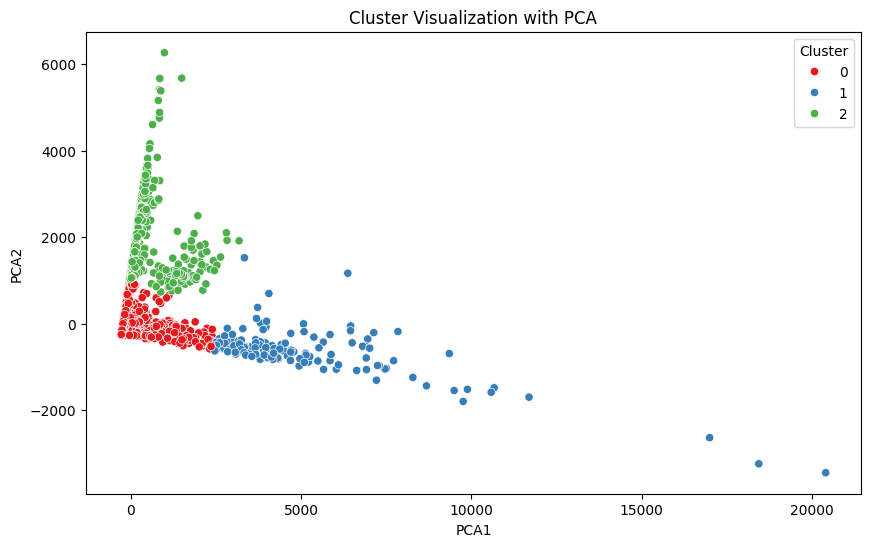

Final Silhouette Score: 0.8121434245162984


In [24]:
# 최적의 클러스터 수 선택
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

# 클러스터 할당 결과를 데이터프레임에 추가
df['Cluster'] = kmeans.labels_

# 클러스터별 데이터 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Data in Clusters')
plt.show()

# 클러스터 센터 확인
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
print("Cluster Centers:\n", centers)

# 2차원 PCA 변환 후 클러스터 시각화
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 변환
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# 클러스터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Cluster Visualization with PCA')
plt.show()

# 최종 실루엣 점수 계산
final_silhouette_score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Final Silhouette Score: {final_silhouette_score}")